

# Introduction

An international air service provider expanding into the North American aviation market. The primary business objective of the company is to achieve maximum profitability while upholding punctuality as a core aspect of its brand identity. Embracing the motto, "Punctuality, tailored for you," the enterprise aims to maintain a reputation for timely service. The overarching aim of this project is to identify the top round-trip routes.

 ## Objective

To aid the carrier in selecting top round-trip routes, the following main tasks will be performed:

* Identifying the busiest round-trip routes
* Determining the most profitable round-trip routes
* Calculating Break-even points

# Methodology

The project is divided into these main steps:

* Data Validation: Ensuring accuracy and reliability through data validation is essential.
* Data Integration: Consolidating and preparing data for analysis requires effective data integration.
* Analysis of Main Tasks with Visual Aids: Utilizing visual aids to analyze the main tasks enhances comprehension and insight.
* Recommendations: Providing recommendations is critical for guiding decision-making and actions.
* Next Steps: Understanding and planning for the next steps are vital for successful execution.

# Execution

## Data Validation

In [1]:
# The first step is to import all the libraries that will be used in the project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the data from the CSV file into Jupyter Notebook. I've chosen to upload each file separately and perform some initial data exploration. 
# However, some analysts may suggest loading all datasets at once.

data_flights=pd.read_csv(r"C:\Users\sergi\OneDrive\Escritorio\Data Project 1\data\Aerial.csv")

C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\4138401638.py:4: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_flights=pd.read_csv(r"C:\Users\sergi\OneDrive\Escritorio\Data Project 1\data\Aerial.csv")


### Data Quality Insight # 1

As evident from the output below, three variables or columns, namely 'OP_CARRIER_FL_NUM', 'AIR_TIME', and 'DISTANCE', display mixed data types. Based on the variable descriptions and preliminary analysis, these three variables are expected to exclusively contain numerical values. However, it appears that certain observations contain non-numerical entries.

Upon closer inspection, the 'DISTANCE' variable stands out with 14,712 rows marked as string type. Investigation reveals that these string entries often take the form of symbols like '**' or other non-numeric characters. For the purpose of this project, we will disregard these non-numeric values. In a real-world scenario, understanding the meaning of such values becomes crucial, especially if they constitute a significant portion of the data or if they are relevant to specific types or subgroups of flights."

In [3]:
# First dataset constains Flights data, includes date, origin, destination, distance, flight number, and occupancy rate
# As observed it the output below it constains 16 columns/variables with 1,915,886 rows or in other words flights 
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [4]:
data_flights.duplicated().sum()

4545

In [5]:
## Below are the first 5 observations, providing us with an initial glimpse into the nature of the information
data_flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [6]:
# Given the warning received during the data loading process, it was wise to inspect the count of non-numerical values in all three columns. 
#The example below illustrates the assessment for one of the columns
data_flights['DISTANCE'].apply(type).value_counts()


DISTANCE
<class 'float'>    1901174
<class 'str'>        14712
Name: count, dtype: int64

In [7]:

data_flights[data_flights['DISTANCE'] == '****']

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1910981,3/24/19,AA,N932AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-3.0,-16.0,0.0,134,****,0.890574
1910982,3/25/19,AA,N945NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-6.0,-28.0,0.0,129,****,0.971716
1910983,3/26/19,AA,N977NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-5.0,-27.0,0.0,120,****,0.357196
1910984,3/27/19,AA,N971AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-1.0,-12.0,0.0,122,****,0.937391
1910985,3/28/19,AA,N937AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-3.0,-9.0,0.0,129,****,0.794303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


In [8]:
## To facilitate future calculations involving these three columns in subsequent project steps, we intend to convert them to a numerical data type (float64)
# Convert the specified columns to float64
data_flights[['DISTANCE', 'OP_CARRIER_FL_NUM','AIR_TIME']] = data_flights[['DISTANCE', 'OP_CARRIER_FL_NUM','AIR_TIME']].apply(pd.to_numeric, errors='coerce')


In [9]:
## Below, we can observe some descriptive statistics of the variables with numerical types. This provides a quick overview of the data distribution for each variable, and in some cases, it aids in identifying outliers and gaining insights into data quality. 
data_flights.describe()

,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
count,1.915846e+06,1.915886e+06,1.915886e+06,1.865535e+06,1.859895e+06,1.915886e+06,1.857425e+06,1.913146e+06,1.915576e+06
mean,2.698268e+03,1.268815e+04,1.268927e+04,1.080275e+01,5.648737e+00,2.694002e-02,1.093854e+02,7.683305e+02,6.502339e-01
std,1.855397e+03,1.521900e+03,1.521249e+03,5.016305e+01,5.241170e+01,1.619082e-01,7.047085e+01,5.802869e+02,2.019994e-01
min,1.000000e+00,1.013500e+04,1.013500e+04,-6.300000e+01,-9.400000e+01,0.000000e+00,-1.210000e+02,-1.947000e+03,3.000000e-01
25%,1.100000e+03,1.129200e+04,1.129200e+04,-6.000000e+00,-1.500000e+01,0.000000e+00,5.900000e+01,3.420000e+02,4.800000e-01
50%,2.269000e+03,1.288900e+04,1.288900e+04,-2.000000e+00,-6.000000e+00,0.000000e+00,9.100000e+01,6.060000e+02,6.500000e-01
75%,4.178000e+03,1.405700e+04,1.405700e+04,7.000000e+00,8.000000e+00,0.000000e+00,1.390000e+02,1.010000e+03,8.247386e-01
max,4.564500e+04,1.621800e+04,1.621800e+04,2.941000e+03,2.923000e+03,1.000000e+00,2.222000e+03,9.898000e+03,1.000000e+00


 ## Data Quality Insight # 2 and 3 
 
 * The second data insight pertains to the presence of missing values in some observations/rows within this dataset, as indicated in the first line of the output above ('count'). Ideally, having complete information for all rows is desirable, but for various reasons, achieving this may not be feasible. It is recommended to consider methods such as backfilling the data to retrieve missing values or assessing, based on the type of data and its intended use, whether the absence of certain observations might impact the quality of the results. As the project progresses, it will become evident if the missing values are crucial for achieving the project goals."

* he third data insight is related to the distribution and the nature of some variables. As observed in the output above, certain rows contain data, such as negative values for travel distance (DISTANCE) and negative flight time (AIR_TIME), which doesn't make intuitive sense. While there might be specific explanations known to the data owner, from a fundamental perspective, these values are questionable. It is advisable to either validate such data for consistency, exclude it from the analysis, or at least be aware of its presence and potential impact on the models or analyses to be conducted with the data. Regarding the distribution of the data, comparing the mean with the median (p50) and examining the P25-P75 range provides an initial insight into the data's characteristics. This can help determine if the data is normally distributed or skewed in a particular direction. For instance, in the case of ARR_DELAY, the positive mean and negative median suggest the presence of some high positive values that are influencing the average.





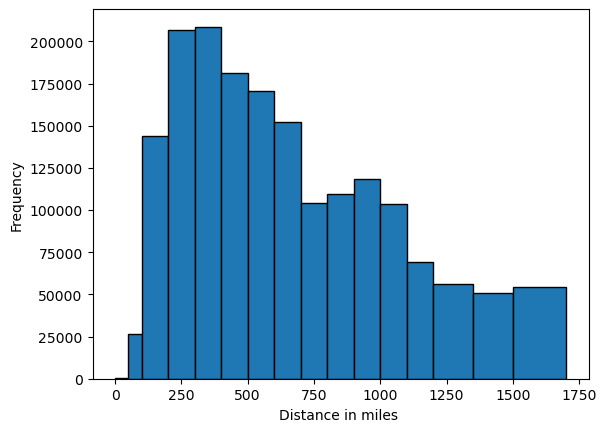

In [10]:
## The code below represents a histogram of the 'distance' variable to provide an overall idea of its distribution.

custom_bins = [0,50, 100, 200,300,400,500,600,700,800,800,900,1000,1100,1200,1350,1500,1700]  # Define custom bins
data_flights['DISTANCE'].plot(kind='hist', bins=custom_bins, edgecolor='black')  
plt.xlabel('Distance in miles ')
plt.ylabel('Frequency')

plt.show()

In [11]:
## As mentioned earlier, negative values for distance don't make sense. However, given that there are only 230 rows out of 1.9 million with such values, excluding them appears to be a reasonable approach.
data_flights[data_flights['DISTANCE'] < 0]

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1910957,3/6/19,AA,N943NN,1409.0,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-5.0,6.0,0.0,NaN,-1947.0,0.477301
1910958,3/7/19,AA,N306PB,1409.0,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-1.0,-10.0,0.0,NaN,-1947.0,0.515156
1910959,3/8/19,AA,N970AN,1409.0,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",24.0,41.0,0.0,NaN,-1947.0,0.493234
1910960,3/9/19,AA,N925NN,1409.0,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-5.0,16.0,0.0,NaN,-1947.0,0.559034
1910961,3/10/19,AA,N957AN,1409.0,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-3.0,-14.0,0.0,NaN,-1947.0,0.739514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915521,3/19/19,AA,N960AN,1414.0,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",4.0,1.0,0.0,123.0,-198.0,0.666987
1915522,3/20/19,AA,N870NN,1414.0,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-7.0,-28.0,0.0,121.0,-198.0,0.521943
1915523,3/21/19,AA,N841NN,1414.0,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-4.0,-19.0,0.0,112.0,-198.0,0.801774
1915524,3/22/19,AA,N886NN,1414.0,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-7.0,-33.0,0.0,117.0,-198.0,0.848048


In [12]:

## Based on the original dataset, we will create a dataset relevant to the project, retaining only the variables necessary for later use and excluding canceled flights as requested.
new_flights = data_flights[data_flights['CANCELLED'] != 1][['ORIGIN', 'DESTINATION', 'DEP_DELAY', 'ARR_DELAY', 'OCCUPANCY_RATE', 'DISTANCE','OP_CARRIER','FL_DATE','TAIL_NUM']]

new_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1864272 entries, 0 to 1915885
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ORIGIN          object 
 1   DESTINATION     object 
 2   DEP_DELAY       float64
 3   ARR_DELAY       float64
 4   OCCUPANCY_RATE  float64
 5   DISTANCE        float64
 6   OP_CARRIER      object 
 7   FL_DATE         object 
 8   TAIL_NUM        object 
dtypes: float64(4), object(5)
memory usage: 142.2+ MB


In [13]:
## Loading the second dataset for this project, containing sample ticket data  which includes itinerary details and fare information
data_tickets=pd.read_csv(r"C:\Users\sergi\OneDrive\Escritorio\Data Project 1\data\Passes.csv")



In [14]:
## A similar analysis, as described above for the first dataset, was performed on this dataset.

data_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [15]:
## One of the variables we are going to use from this dataset is the 'ITIN_FARE,' representing the Itinerary Fare Per Person. Therefore, we checked the number of observations with a float type, which are most likely indicative of missing or null data.
data_tickets['ITIN_FARE'].apply(type).value_counts()

ITIN_FARE
<class 'str'>      1166325
<class 'float'>        960
Name: count, dtype: int64

In [16]:
## Below, we can observe some descriptive statistics of the variables with numerical types. This provides a quick overview of the data distribution for each variable, and in some cases, it aids in identifying outliers and gaining insights into data quality. 
data_tickets.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


In [17]:
##Counting the number of round trips since those are the ticket information we are interested in.
data_tickets['ROUNDTRIP'].value_counts()

ROUNDTRIP
1.0    708600
0.0    458685
Name: count, dtype: int64

In [18]:
## To facilitate future calculations involving fare values in subsequent project steps, we intend to convert  to a numerical data type 


data_tickets['ITIN_FARE'] = pd.to_numeric(data_tickets['ITIN_FARE'], errors='coerce')

In [19]:
## Descriptive statistics of numerical variables. Some insights obtained from this distribution include that all ticket information  Q1
data_tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS,ITIN_FARE
count,1.167285e+06,1167285.0,1167285.0,1.167285e+06,1.165308e+06,1.163149e+06
mean,1.715602e+11,2019.0,1.0,6.070497e-01,2.070102e+00,4.082506e+02
std,6.834957e+10,0.0,0.0,4.884062e-01,5.840215e+00,7.775517e+02
min,2.019120e+05,2019.0,1.0,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.019115e+11,2019.0,1.0,0.000000e+00,1.000000e+00,2.060000e+02
50%,2.019128e+11,2019.0,1.0,1.000000e+00,1.000000e+00,3.480000e+02
75%,2.019140e+11,2019.0,1.0,1.000000e+00,1.000000e+00,5.280000e+02
max,2.019153e+11,2019.0,1.0,1.000000e+00,7.690000e+02,3.774000e+05


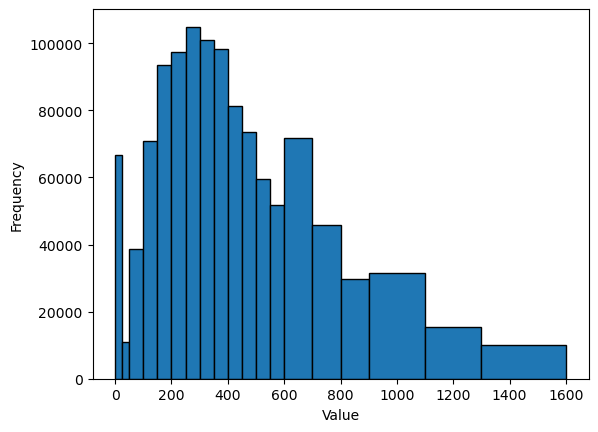

In [20]:
## The code below represents a histogram of the fare values variable to provide an overall idea of its distribution.
custom_bins = [0, 25, 50, 100, 150, 200, 250,300,350,400,450,500,550,600,700,800,900,1100,1300,1600]  # Define custom bin 
data_tickets['ITIN_FARE'].plot(kind='hist', bins=custom_bins, edgecolor='black')  
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

In [21]:
# Based on the original dataset, we will create a dataset relevant to the project, retaining only the variables necessary for later use and excluding single ticket flights as requested.

new_tickets = data_tickets[data_tickets['ROUNDTRIP'] == 1][['ORIGIN', 'DESTINATION','REPORTING_CARRIER','PASSENGERS','ITIN_FARE']]
new_tickets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708600 entries, 0 to 1167284
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ORIGIN             708600 non-null  object 
 1   DESTINATION        708600 non-null  object 
 2   REPORTING_CARRIER  708600 non-null  object 
 3   PASSENGERS         707403 non-null  float64
 4   ITIN_FARE          706750 non-null  float64
dtypes: float64(2), object(3)
memory usage: 32.4+ MB


In [22]:
## Load last dataset for this project, airport information

data_airports=pd.read_csv(r"C:\Users\sergi\OneDrive\Escritorio\Data Project 1\data\Hubs.csv")

In [23]:
data_airports.head()

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [24]:
data_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [25]:
## The only information relevant for this project is the type of airport and the IATA_CODE, which serves as the unique identifier/key to be used for joining with other datasets.
airports_code = data_airports[['TYPE', 'IATA_CODE']]


## Conducting Data Integration

After exploring the datasets, the goal is to combine the relevant data into a single dataset for performing the tasks outlined in this project. Ideally, unique identifiers or a combination of them would be used for seamless 1:1 data merging. However, upon exploring the dataset, no direct or smooth 1:1 way to combine the flight and ticket data was identified. Ideally, having the 'ITIN_ID' in the Flights dataset would simplify the process, but since this is not the case, alternative methods will be employed to join the data, as observed in the following lines.

In [26]:

### First, we combine the airport dataset with the Flights dataset, focusing on big and medium airports as specified in the project requirements.

# First join based on the ORIGIN airport 
flights_IATA = new_flights.merge(airports_code, left_on='ORIGIN', right_on='IATA_CODE', how='inner') \
                       .rename(columns={'TYPE': 'TYPE_Origin'})
## Second Join based on the destination airport 
flights_IATA_2 = flights_IATA.merge(airports_code, left_on='DESTINATION', right_on='IATA_CODE', how='inner') \
                       .rename(columns={'TYPE': 'TYPE_Destination'})
## Delete columns we dont need 
flights_IATA_2 = flights_IATA_2.drop(columns=['IATA_CODE_x','IATA_CODE_y'])
flights_IATA_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894498 entries, 0 to 1894497
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ORIGIN            object 
 1   DESTINATION       object 
 2   DEP_DELAY         float64
 3   ARR_DELAY         float64
 4   OCCUPANCY_RATE    float64
 5   DISTANCE          float64
 6   OP_CARRIER        object 
 7   FL_DATE           object 
 8   TAIL_NUM          object 
 9   TYPE_Origin       object 
 10  TYPE_Destination  object 
dtypes: float64(4), object(7)
memory usage: 159.0+ MB


### Comment on the above Merge

The provided information does not specify whether the origin or destination airports need to be medium or large. Given that some observations have small or closed airports as the destination, the decision was made to only consider observations where both the ORIGIN and DESTINATION airports are either medium or large. The exclusion based on this criterion will be applied later in the analysis.


In [27]:
## Since identifying a one-to-one or one-to-many match between the flight and ticket data was not feasible, the most reasonable approach to join these datasets was to aggregate the ticket data based on the ORIGIN, DESTINATION, and CARRIER. 
#This aggregation determined the median of the fare for those instances, and the median is less sensitive to extreme values, making it a robust choice for this purpose.

new_tickets_group = new_tickets.groupby(['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER'])['ITIN_FARE'].median().reset_index()
new_tickets_group

,ORIGIN,DESTINATION,REPORTING_CARRIER,ITIN_FARE
0,ABE,ABQ,DL,437.0
1,ABE,ABQ,OO,631.0
2,ABE,AGS,9E,299.0
3,ABE,AMA,OH,654.0
4,ABE,ASE,EV,595.0
...,...,...,...,...
87878,YUM,SRQ,OO,696.0
87879,YUM,TOL,OO,335.0
87880,YUM,TPA,OO,612.0
87881,YUM,TPA,YV,409.0


In [28]:
## Joining the median fare values obtained in the previous step into the latest Flight dataset, based on 'ORIGIN', 'DESTINATION', 'REPORTING_CARRIER'.

flights_IATA_2.rename(columns={'OP_CARRIER': 'REPORTING_CARRIER'}, inplace=True)

Final = flights_IATA_2.merge(new_tickets_group, on=['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER'], how='left')


In [29]:
## Overview of the FInal dataset created in the last cell execution
Final

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,DISTANCE,REPORTING_CARRIER,FL_DATE,TAIL_NUM,TYPE_Origin,TYPE_Destination,ITIN_FARE
0,RSW,CLE,-8.0,-6.0,0.97,1025.0,WN,2019-03-02,N955WN,large_airport,large_airport,108.0
1,RSW,CLE,-7.0,-22.0,0.63,1025.0,WN,2019-03-09,N754SW,large_airport,large_airport,108.0
2,RSW,CLE,-16.0,-9.0,0.98,1025.0,UA,2019-03-24,N14249,large_airport,large_airport,296.0
3,RSW,CLE,-1.0,8.0,0.36,1025.0,UA,2019-03-11,N14240,large_airport,large_airport,296.0
4,RSW,CLE,-6.0,1.0,0.45,1025.0,UA,2019-03-10,N11206,large_airport,large_airport,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1894493,AZA,OGD,88.0,86.0,0.71,544.0,G4,2019-01-25,317NV,medium_airport,medium_airport,126.0
1894494,AZA,OGD,70.0,74.0,0.36,544.0,G4,2019-01-07,255NV,medium_airport,medium_airport,126.0
1894495,AZA,OGD,-5.0,2.0,0.61,544.0,G4,2019-01-28,317NV,medium_airport,medium_airport,126.0
1894496,AZA,OGD,-6.0,6.0,0.54,544.0,G4,2019-01-11,248NV,medium_airport,medium_airport,126.0


In [30]:
 # Identifying the number of observations with missing fare data, which is less than 10% of the total data, is acceptable for continuation.

Final['ITIN_FARE'].isna().sum()

105406

In [31]:
 Final['TYPE_Origin'].value_counts(dropna=False)


TYPE_Origin
large_airport     1702572
medium_airport     169523
closed              15098
small_airport        7305
Name: count, dtype: int64

In [32]:
## Only observations with large or medium airports in both ORIGIN and DESTINATION were considered.

Final = Final[((Final['TYPE_Origin'] == 'large_airport') | (Final['TYPE_Origin'] == 'medium_airport')) & ( (Final['TYPE_Destination'] == 'medium_airport') | (Final['TYPE_Destination'] == 'large_airport'))]

Final

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,DISTANCE,REPORTING_CARRIER,FL_DATE,TAIL_NUM,TYPE_Origin,TYPE_Destination,ITIN_FARE
0,RSW,CLE,-8.0,-6.0,0.97,1025.0,WN,2019-03-02,N955WN,large_airport,large_airport,108.0
1,RSW,CLE,-7.0,-22.0,0.63,1025.0,WN,2019-03-09,N754SW,large_airport,large_airport,108.0
2,RSW,CLE,-16.0,-9.0,0.98,1025.0,UA,2019-03-24,N14249,large_airport,large_airport,296.0
3,RSW,CLE,-1.0,8.0,0.36,1025.0,UA,2019-03-11,N14240,large_airport,large_airport,296.0
4,RSW,CLE,-6.0,1.0,0.45,1025.0,UA,2019-03-10,N11206,large_airport,large_airport,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1894493,AZA,OGD,88.0,86.0,0.71,544.0,G4,2019-01-25,317NV,medium_airport,medium_airport,126.0
1894494,AZA,OGD,70.0,74.0,0.36,544.0,G4,2019-01-07,255NV,medium_airport,medium_airport,126.0
1894495,AZA,OGD,-5.0,2.0,0.61,544.0,G4,2019-01-28,317NV,medium_airport,medium_airport,126.0
1894496,AZA,OGD,-6.0,6.0,0.54,544.0,G4,2019-01-11,248NV,medium_airport,medium_airport,126.0


In [33]:
### Identify the number of observations with a different type of airport between ORIGIN AND destination 

same_type_count = (Final['TYPE_Origin'] != Final['TYPE_Destination']).sum()
print(same_type_count)

321749


In [34]:
## Data check

Final['TYPE_Destination'].value_counts(dropna=False)


TYPE_Destination
large_airport     1680688
medium_airport     169044
Name: count, dtype: int64

### Task # 1 

* The busiest round trip routes in terms of number of round trip flights in the quarter.Exclude canceled flights when performing the calculation.

Note: An example of a round trip route is the combination of JFK to ORD and ORD to JFK. The opposite order of the
route, ORD to JFK and JFK to ORD, would be considered the same round trip.


In [35]:
## NEW column in the dataset with sorter values in each row so we can account for the roundtrip

Final['SortedCombination'] = Final[['ORIGIN', 'DESTINATION']].apply(sorted, axis=1).apply(tuple)

# Calculate the frequency of each combination
combination_counts = Final['SortedCombination'].value_counts().reset_index()
combination_counts.columns = ['Combination', 'Frequency']

# Get the top 10 combinations with the highest frequency
top_10_combinations = combination_counts.nlargest(10, 'Frequency')

# Print the top 10 combinations
print("Top 10 Combinations (ORIGIN to DESTINATION) with the Highest Frequency:")
print(top_10_combinations)



Top 10 Combinations (ORIGIN to DESTINATION) with the Highest Frequency:
  Combination  Frequency
0  (LAX, SFO)       8340
1  (LGA, ORD)       7156
2  (LAS, LAX)       6511
3  (JFK, LAX)       6320
4  (LAX, SEA)       4999
5  (BOS, LGA)       4820
6  (HNL, OGG)       4794
7  (PDX, SEA)       4774
8  (ATL, MCO)       4707
9  (ATL, LGA)       4594


C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\2014684372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final['SortedCombination'] = Final[['ORIGIN', 'DESTINATION']].apply(sorted, axis=1).apply(tuple)


## Commets Task One

Based on the dataset called Final, which excludes canceled flights and only includes flights departing and arriving from a medium or large airport, the above list shows the top destinations with the most flights. If we are interested in the frequency of roundtrips, we can divide the frequency number by 2. For example, the airport pair (LAX, SFO).

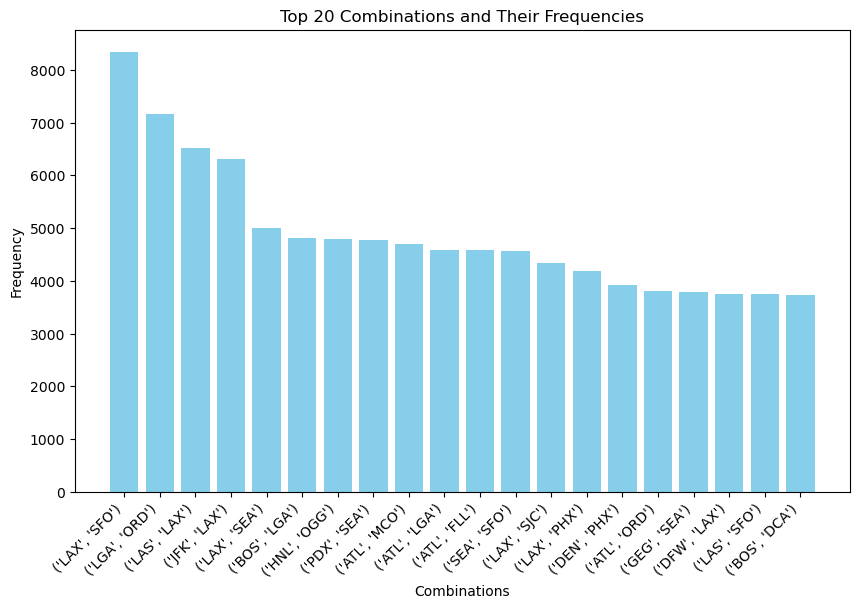

In [36]:
##Below is a bar plot representing the top 20 frequencies.
#As observed, after the top 4, the slope of decrease is much smaller, indicating that the difference between ranks 5 to 20 is not as significant.
top_10_combinations = combination_counts.head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_combinations['Combination'].astype(str), top_10_combinations['Frequency'], color='skyblue')
plt.title('Top 20 Combinations and Their Frequencies')
plt.xlabel('Combinations')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


### Task 2 

The most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of other
key components and total round trip flights in the quarter for the top  most profitable
routes. Exclude canceled flights from these calculations.

Some Assuptions Neeeded 

Cost 

* Direct Operating cost 8 USD per mile total
* non Direct cost (insurance, etc) - 1 USD per mile total
* Airport operational costs for the right to use the airports and related services aret 8K for medium airports and 15K U for large airports. There is one charge for each airport where a flight lands. Thus, a round trip flight has a total of two airport charges.
* Delays that are 20 minutes or less are free, however each additional minute of delay costs the airline 80 in added operational costs. This is charged separately for both arrival and departure delays.

In [37]:
condition_large_airport = (Final['TYPE_Destination'] == 'large_airport')

# Base expenses calculation
base_expenses = (8 + 1) * Final['DISTANCE']

# Expenses modification based on DEP_DELAY
expenses_dep_delay = np.where(Final['DEP_DELAY'] > 20, 80 * (Final['DEP_DELAY'] - 20), 0)

# Expenses modification based on ARR_DELAY
expenses_dep_delay = np.where(Final['ARR_DELAY'] > 20, 80 * (Final['ARR_DELAY'] - 20), 0)

# Apply conditions using .loc
Final.loc[:, 'Cost_Oneway_d'] = base_expenses + np.where(condition_large_airport, 15000, 8000) + expenses_dep_delay




C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\3706787392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final.loc[:, 'Cost_Oneway_d'] = base_expenses + np.where(condition_large_airport, 15000, 8000) + expenses_dep_delay


In [38]:
## Double check the new calculated variable 

Final

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,DISTANCE,REPORTING_CARRIER,FL_DATE,TAIL_NUM,TYPE_Origin,TYPE_Destination,ITIN_FARE,SortedCombination,Cost_Oneway_d
0,RSW,CLE,-8.0,-6.0,0.97,1025.0,WN,2019-03-02,N955WN,large_airport,large_airport,108.0,"(CLE, RSW)",24225.0
1,RSW,CLE,-7.0,-22.0,0.63,1025.0,WN,2019-03-09,N754SW,large_airport,large_airport,108.0,"(CLE, RSW)",24225.0
2,RSW,CLE,-16.0,-9.0,0.98,1025.0,UA,2019-03-24,N14249,large_airport,large_airport,296.0,"(CLE, RSW)",24225.0
3,RSW,CLE,-1.0,8.0,0.36,1025.0,UA,2019-03-11,N14240,large_airport,large_airport,296.0,"(CLE, RSW)",24225.0
4,RSW,CLE,-6.0,1.0,0.45,1025.0,UA,2019-03-10,N11206,large_airport,large_airport,296.0,"(CLE, RSW)",24225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894493,AZA,OGD,88.0,86.0,0.71,544.0,G4,2019-01-25,317NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",18176.0
1894494,AZA,OGD,70.0,74.0,0.36,544.0,G4,2019-01-07,255NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",17216.0
1894495,AZA,OGD,-5.0,2.0,0.61,544.0,G4,2019-01-28,317NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",12896.0
1894496,AZA,OGD,-6.0,6.0,0.54,544.0,G4,2019-01-11,248NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",12896.0


## Comment

Ideally, we would prefer to have information for both flights in a round trip to accurately calculate all expenses. However, I couldn't identify a logical way to collapse the dataset, despite exploring options such as data, tail numbers, origin, carrier, and destination. As a workaround, I've assumed that the cost for both legs of the trip is the same, with the exception of the airport, as indicated in the assumptions.


In [39]:
# This code calculates expenses for the return journey, assuming the same conditions as the code above.
condition_large_airport = (Final['ORIGIN'] == 'large_airport')

# Base expenses calculation
base_expenses = (8 + 1) * Final['DISTANCE']

# Expenses modification based on DEP_DELAY
expenses_dep_delay_large_airport = np.where(Final['DEP_DELAY'] > 20, 80 * (Final['DEP_DELAY'] - 20), 0)
expenses_dep_delay_small_airport = np.where(Final['DEP_DELAY'] > 20, 80 * (Final['DEP_DELAY'] - 20), 0)

# Expenses modification based on ARR_DELAY
expenses_arr_delay_large_airport = np.where(Final['ARR_DELAY'] > 20, 80 * (Final['ARR_DELAY'] - 20), 0)
expenses_arr_delay_small_airport = np.where(Final['ARR_DELAY'] > 20, 80 * (Final['ARR_DELAY'] - 20), 0)

# Apply conditions using .loc
Final.loc[:, 'Cost_Oneway_O'] = base_expenses + np.where(condition_large_airport, 15000, 8000) + np.where(condition_large_airport, expenses_dep_delay_large_airport, expenses_dep_delay_small_airport) + np.where(condition_large_airport, expenses_arr_delay_large_airport, expenses_arr_delay_small_airport)

Final.loc[:, 'Cost_RoundsTrip'] = Final['Cost_Oneway_d'] + Final['Cost_Oneway_O']



C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\1947807097.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final.loc[:, 'Cost_Oneway_O'] = base_expenses + np.where(condition_large_airport, 15000, 8000) + np.where(condition_large_airport, expenses_dep_delay_large_airport, expenses_dep_delay_small_airport) + np.where(condition_large_airport, expenses_arr_delay_large_airport, expenses_arr_delay_small_airport)
C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\1947807097.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [40]:
## Calculation of Revenue, Profit, and Profit Margin

#**Revenue:** Calculated using the median fare of the ticket dataset grouped by ORIGIN, Destination, and carrier.
# **Profit:** Obtained by subtracting the round trip cost from the revenue.
# **Profit Margin:** Calculated as the ratio of profit to revenue, multiplied by 100.
## Revenue

Final.loc[:, 'Revenue'] = Final['OCCUPANCY_RATE'] * 150 * Final['ITIN_FARE'] +Final['OCCUPANCY_RATE'] * 150 * 40


### Profit

Final.loc[:, 'Profit'] = Final['Revenue']-  Final['Cost_RoundsTrip']

### Profit Margin 

Final.loc[:, 'Profit_margin'] = (Final['Profit'] / Final['Revenue'])*100

C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\1215015185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final.loc[:, 'Revenue'] = Final['OCCUPANCY_RATE'] * 150 * Final['ITIN_FARE'] +Final['OCCUPANCY_RATE'] * 150 * 40
C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\1215015185.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final.loc[:, 'Profit'] = Final['Revenue']-  Final['Cost_RoundsTrip']
C:\Users\sergi\AppData\Local\Temp\ipykernel_14584\1215015185.py:17: SettingWithCopyWarning: 
A value is

In [41]:
## Double check the new calculated variables 
Final

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,DISTANCE,REPORTING_CARRIER,FL_DATE,TAIL_NUM,TYPE_Origin,TYPE_Destination,ITIN_FARE,SortedCombination,Cost_Oneway_d,Cost_Oneway_O,Cost_RoundsTrip,Revenue,Profit,Profit_margin
0,RSW,CLE,-8.0,-6.0,0.97,1025.0,WN,2019-03-02,N955WN,large_airport,large_airport,108.0,"(CLE, RSW)",24225.0,17225.0,41450.0,21534.0,-19916.0,-92.486301
1,RSW,CLE,-7.0,-22.0,0.63,1025.0,WN,2019-03-09,N754SW,large_airport,large_airport,108.0,"(CLE, RSW)",24225.0,17225.0,41450.0,13986.0,-27464.0,-196.367796
2,RSW,CLE,-16.0,-9.0,0.98,1025.0,UA,2019-03-24,N14249,large_airport,large_airport,296.0,"(CLE, RSW)",24225.0,17225.0,41450.0,49392.0,7942.0,16.079527
3,RSW,CLE,-1.0,8.0,0.36,1025.0,UA,2019-03-11,N14240,large_airport,large_airport,296.0,"(CLE, RSW)",24225.0,17225.0,41450.0,18144.0,-23306.0,-128.450176
4,RSW,CLE,-6.0,1.0,0.45,1025.0,UA,2019-03-10,N11206,large_airport,large_airport,296.0,"(CLE, RSW)",24225.0,17225.0,41450.0,22680.0,-18770.0,-82.760141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894493,AZA,OGD,88.0,86.0,0.71,544.0,G4,2019-01-25,317NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",18176.0,23616.0,41792.0,17679.0,-24113.0,-136.393461
1894494,AZA,OGD,70.0,74.0,0.36,544.0,G4,2019-01-07,255NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",17216.0,21216.0,38432.0,8964.0,-29468.0,-328.737171
1894495,AZA,OGD,-5.0,2.0,0.61,544.0,G4,2019-01-28,317NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",12896.0,12896.0,25792.0,15189.0,-10603.0,-69.807097
1894496,AZA,OGD,-6.0,6.0,0.54,544.0,G4,2019-01-11,248NV,medium_airport,medium_airport,126.0,"(AZA, OGD)",12896.0,12896.0,25792.0,13446.0,-12346.0,-91.819128


### Comment # 2 Task 2 

After calculating the total cost, revenue, and profit for each observation, we aggregate the data by each round trip to identify the most profitable route. Descriptive statistics are employed for informational purposes, but the primary determinant for the most profitable routes is the median of the Profit Margin

In [42]:
##This code calculates median, mean, count, and specific percentiles (25th and 75th) for selected columns within a grouped dataset based on the 'SortedCombination' column. 
#It then organizes and renames the columns in the resulting grouped_data DataFrame, facilitating analysis and interpretation of the aggregated information.

percentiles = [25, 75]
columns_to_analyze = ['Profit_margin', 'DEP_DELAY','ARR_DELAY','Profit','Cost_RoundsTrip', 'Revenue']  

grouped_data = (
    Final.groupby('SortedCombination')[columns_to_analyze]
    .agg(['median', 'mean', 'count', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
    .reset_index()
    .rename(columns={f'<lambda_{i}>': f'P{percentiles[i]}' for i in range(len(percentiles))})
)

# Get the top 10 median values



grouped_data.columns = ['SortedCombination'] + [f'{col}_{stat}' for col, stat in grouped_data.columns[1:]]

# Get the top 10 median values
top_11_median = grouped_data.nlargest(11, 'Profit_margin_median')

top_11_median

,SortedCombination,Profit_margin_median,Profit_margin_mean,Profit_margin_count,Profit_margin_P25,Profit_margin_P75,DEP_DELAY_median,DEP_DELAY_mean,DEP_DELAY_count,DEP_DELAY_P25,...,Cost_RoundsTrip_median,Cost_RoundsTrip_mean,Cost_RoundsTrip_count,Cost_RoundsTrip_P25,Cost_RoundsTrip_P75,Revenue_median,Revenue_mean,Revenue_count,Revenue_P25,Revenue_P75
938,"(CLT, TRI)",74.751324,74.751324,1,74.751324,74.751324,-6.0,1.106007,849,-9.00,...,25142.0,26153.825677,849,25142.0,25142.0,99577.50,99577.500000,1,99577.500,99577.500
860,"(CLT, GSP)",67.339986,61.939562,1547,54.594615,73.999002,-3.0,7.051713,1547,-5.00,...,24350.0,25783.018746,1547,24350.0,24350.0,76814.25,76618.532482,1547,55352.625,94702.500
868,"(CLT, ILM)",65.479307,61.365750,1465,52.412605,73.732386,-3.0,4.509898,1465,-6.00,...,26330.0,23831.023891,1465,19330.0,26330.0,68932.50,69978.132082,1465,50625.000,88348.500
895,"(CLT, MYR)",65.192149,60.277298,1202,51.447490,76.420488,-3.0,3.485229,1354,-6.00,...,25826.0,23332.085672,1354,18826.0,25826.0,66643.50,69363.731281,1202,49333.500,84819.000
46,"(ADK, ANC)",64.939713,60.917801,46,53.660196,72.391350,-7.0,-0.543478,46,-14.75,...,43476.0,41935.130435,46,37456.0,44456.0,120281.25,119905.076087,46,86369.250,151712.625
859,"(CLT, GSO)",64.298104,59.475291,403,50.017345,72.276373,-3.0,5.480161,1487,-6.00,...,24494.0,25770.180229,1487,24494.0,24494.0,70785.00,70247.255583,403,51183.000,90931.500
97,"(ANC, SCC)",63.349462,58.055702,241,50.601449,71.236287,-6.0,-1.265560,241,-10.00,...,27268.0,29607.419087,241,27268.0,34268.0,79200.00,79173.622407,241,60000.000,100093.500
1454,"(DTW, LSE)",62.544065,55.743271,30,43.473976,67.585098,-3.5,24.416667,60,-8.25,...,30488.0,32385.333333,60,23488.0,30488.0,63808.50,65611.000000,30,46774.875,79490.250
315,"(AVL, CLT)",61.605111,57.008672,548,48.250368,69.867303,-4.0,5.442959,1122,-7.00,...,24638.0,26085.914439,1122,24638.0,24638.0,65722.50,67093.686131,548,48645.000,85905.000
1176,"(DEN, EGE)",61.251227,51.846497,438,41.162698,71.427672,-1.0,16.766393,488,-6.00,...,25160.0,25332.459016,488,18160.0,25160.0,57459.00,65808.726027,438,39162.000,91476.000


In [43]:
grouped_data

,SortedCombination,Profit_margin_median,Profit_margin_mean,Profit_margin_count,Profit_margin_P25,Profit_margin_P75,DEP_DELAY_median,DEP_DELAY_mean,DEP_DELAY_count,DEP_DELAY_P25,...,Cost_RoundsTrip_median,Cost_RoundsTrip_mean,Cost_RoundsTrip_count,Cost_RoundsTrip_P25,Cost_RoundsTrip_P75,Revenue_median,Revenue_mean,Revenue_count,Revenue_P25,Revenue_P75
0,"(ABE, ATL)",37.558817,31.222222,434,15.351191,55.908128,-3.0,6.873272,434,-5.00,...,35456.0,33635.078341,434,28456.0,35456.0,54288.0,57371.863479,434,41050.125,72389.250
1,"(ABE, CLT)",40.601899,32.241016,502,16.842658,52.866718,-3.0,3.838645,502,-7.00,...,31658.0,29279.593625,502,24658.0,31658.0,46854.0,48398.620518,502,34799.625,59999.625
2,"(ABE, DTW)",40.712800,31.515153,495,20.089920,55.549637,-3.0,13.663984,497,-6.00,...,30650.0,30091.046278,497,23650.0,30650.0,48708.0,49101.945455,495,36442.500,60885.000
3,"(ABE, FLL)",-159.830601,-171.957658,40,-198.361404,-119.361486,-1.0,5.400000,40,-6.00,...,39198.0,39640.000000,40,34738.0,41738.0,15300.0,15967.125000,40,11700.000,19066.500
4,"(ABE, ORD)",30.275560,-26.491935,291,-2.703780,45.991302,-4.0,29.275000,320,-8.00,...,34772.0,37474.625000,320,27772.0,36572.0,51414.0,50989.489691,291,35762.250,68181.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,"(STL, TPA)",1.165036,-9.611876,421,-30.338336,23.520564,0.0,11.299287,421,-3.00,...,38642.0,40131.026128,421,38642.0,38642.0,40512.0,40673.173397,421,30384.000,51127.500
2874,"(STL, TUL)",31.999675,20.442259,325,0.350090,47.683797,-1.0,6.193846,325,-4.00,...,29318.0,30152.215385,325,29318.0,29318.0,43431.0,43408.112308,325,30121.500,56740.500
2875,"(SYR, TPA)",-266.492153,-291.675914,72,-374.328368,-169.279568,-0.5,22.486111,72,-7.25,...,42872.0,47093.111111,72,42872.0,44372.0,13186.5,13712.000000,72,9690.750,15967.500
2876,"(TPA, TTN)",-135.716061,-162.419229,157,-209.377330,-74.708746,-2.0,14.987261,157,-10.00,...,40190.0,40028.216561,157,33190.0,40190.0,16762.5,17364.410828,157,12516.000,21232.500


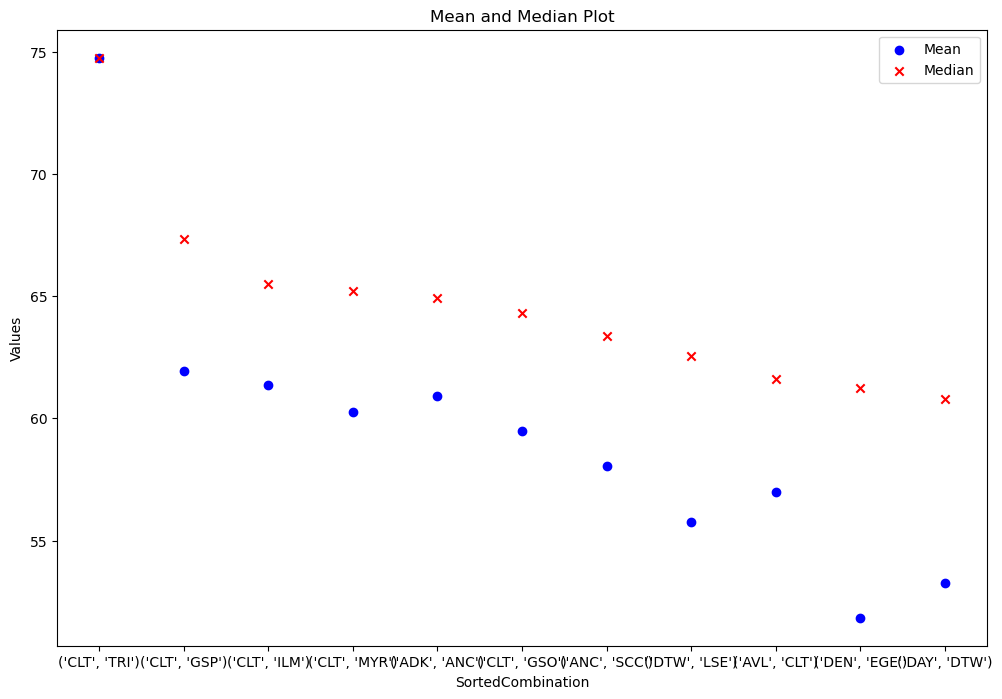

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
top_11_median['SortedCombination'] = top_11_median['SortedCombination'].astype(str)
# Plotting mean values
ax.scatter(top_11_median['SortedCombination'], top_11_median['Profit_margin_mean'], label='Mean', color='blue', marker='o')

# Plotting median values
ax.scatter(top_11_median['SortedCombination'], top_11_median['Profit_margin_median'], label='Median', color='red', marker='x')

# Adding labels and title
ax.set_xlabel('SortedCombination')
ax.set_ylabel('Values')
ax.set_title('Mean and Median Plot')

# Adding legend
ax.legend()

# Show the plot
plt.show()

As observed in the previous plot and code output, the analysis focused on the most profitable routes based on the median Profit Margin, indicating that these routes exhibit the highest median efficiency in converting revenue into profit. The Profit Margin proves superior to considering profit numbers in isolation. This is because it offers a relative measure, expressing profit as a percentage of revenue. While total profit provides the overall earnings, the profitability margin highlights how efficiently a company is turning its sales into profit. A higher profitability margin suggests better cost management and operational efficiency, providing a more insightful metric for assessing a company's financial health and performance


 It is relevant to notice that the roundtrip CLT, TRI has only one observation, indicating that there is only one flight with that combination under the parameters set above. Therefore, it may not be considered due to the low number of occurrences. Based on the below code only 1 with Fair information based on my join methodology

In [45]:


condition = (Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'TRI')

# Display rows that meet the condition
result_df = Final[condition]
result_df.describe()

,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,DISTANCE,ITIN_FARE,Cost_Oneway_d,Cost_Oneway_O,Cost_RoundsTrip,Revenue,Profit,Profit_margin
count,424.000000,424.000000,424.000000,424.0,1.0,424.000000,424.000000,424.000000,1.0,1.0,1.000000
mean,3.646226,-0.516509,0.638491,119.0,895.0,16446.849057,9849.490566,26296.339623,99577.5,74435.5,74.751324
std,25.887049,27.385346,0.213011,0.0,NaN,1454.163903,2963.663566,4412.304956,NaN,NaN,NaN
min,-18.000000,-30.000000,0.300000,119.0,895.0,16071.000000,9071.000000,25142.000000,99577.5,74435.5,74.751324
25%,-7.000000,-15.000000,0.460000,119.0,895.0,16071.000000,9071.000000,25142.000000,99577.5,74435.5,74.751324
50%,-5.000000,-9.000000,0.620000,119.0,895.0,16071.000000,9071.000000,25142.000000,99577.5,74435.5,74.751324
75%,-1.000000,2.000000,0.830000,119.0,895.0,16071.000000,9071.000000,25142.000000,99577.5,74435.5,74.751324
max,188.000000,175.000000,1.000000,119.0,895.0,28471.000000,34911.000000,63382.000000,99577.5,74435.5,74.751324


### Task 3 
Recommend routes based on selected factors

In [46]:
top_11_median.iloc[1:6][['SortedCombination','Profit_margin_median', 'DEP_DELAY_median', 'DEP_DELAY_P75','ARR_DELAY_median','ARR_DELAY_P75']]


,SortedCombination,Profit_margin_median,DEP_DELAY_median,DEP_DELAY_P75,ARR_DELAY_median,ARR_DELAY_P75
860,"('CLT', 'GSP')",67.339986,-3.0,3.0,-7.0,2.00
868,"('CLT', 'ILM')",65.479307,-3.0,2.0,-7.0,3.00
895,"('CLT', 'MYR')",65.192149,-3.0,0.0,-8.0,1.00
46,"('ADK', 'ANC')",64.939713,-7.0,7.5,-22.0,-4.25
859,"('CLT', 'GSO')",64.298104,-3.0,2.0,-8.0,3.00


As observed in the output above, I would recommend considering five roundtrips based on three criteria: profitability, departure delay, and arrival delay. Profitability is important since this seems to be a for-profit business, and I believe they are seeking profit. Departure delay and arrival delay are crucial for fulfilling the company's motto of punctuality. As observed, the median and P75 in both cases are closer to 0 or negative, indicating that they arrived earlier or departed on schedule.

### Task  4 

- The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the top round trip routes that you recommend. 

* Each airplane will cost 100 M

In [47]:
 
#Based on the collapsed dataset created in the previous task, a new variable called "breakeven" is generated. 
#This variable represents the breakeven point and is calculated by dividing the capital cost of each plane (assumed to be 100 million) by the profit.

grouped_data['breakeven'] = np.where(grouped_data['Profit_median'] >= 0, 100000000 / grouped_data['Profit_median'], 0)



grouped_data = grouped_data.drop(columns=['DEP_DELAY_count','ARR_DELAY_count','Profit_count'])

grouped_data

,SortedCombination,Profit_margin_median,Profit_margin_mean,Profit_margin_count,Profit_margin_P25,Profit_margin_P75,DEP_DELAY_median,DEP_DELAY_mean,DEP_DELAY_P25,DEP_DELAY_P75,...,Cost_RoundsTrip_mean,Cost_RoundsTrip_count,Cost_RoundsTrip_P25,Cost_RoundsTrip_P75,Revenue_median,Revenue_mean,Revenue_count,Revenue_P25,Revenue_P75,breakeven
0,"(ABE, ATL)",37.558817,31.222222,434,15.351191,55.908128,-3.0,6.873272,-5.00,2.0,...,33635.078341,434,28456.0,35456.0,54288.0,57371.863479,434,41050.125,72389.250,5042.101548
1,"(ABE, CLT)",40.601899,32.241016,502,16.842658,52.866718,-3.0,3.838645,-7.00,1.0,...,29279.593625,502,24658.0,31658.0,46854.0,48398.620518,502,34799.625,59999.625,5267.108226
2,"(ABE, DTW)",40.712800,31.515153,495,20.089920,55.549637,-3.0,13.663984,-6.00,3.0,...,30091.046278,497,23650.0,30650.0,48708.0,49101.945455,495,36442.500,60885.000,4950.495050
3,"(ABE, FLL)",-159.830601,-171.957658,40,-198.361404,-119.361486,-1.0,5.400000,-6.00,1.5,...,39640.000000,40,34738.0,41738.0,15300.0,15967.125000,40,11700.000,19066.500,0.000000
4,"(ABE, ORD)",30.275560,-26.491935,291,-2.703780,45.991302,-4.0,29.275000,-8.00,51.0,...,37474.625000,320,27772.0,36572.0,51414.0,50989.489691,291,35762.250,68181.750,6459.218112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,"(STL, TPA)",1.165036,-9.611876,421,-30.338336,23.520564,0.0,11.299287,-3.00,12.0,...,40131.026128,421,38642.0,38642.0,40512.0,40673.173397,421,30384.000,51127.500,219538.968167
2874,"(STL, TUL)",31.999675,20.442259,325,0.350090,47.683797,-1.0,6.193846,-4.00,8.0,...,30152.215385,325,29318.0,29318.0,43431.0,43408.112308,325,30121.500,56740.500,7248.215127
2875,"(SYR, TPA)",-266.492153,-291.675914,72,-374.328368,-169.279568,-0.5,22.486111,-7.25,20.5,...,47093.111111,72,42872.0,44372.0,13186.5,13712.000000,72,9690.750,15967.500,0.000000
2876,"(TPA, TTN)",-135.716061,-162.419229,157,-209.377330,-74.708746,-2.0,14.987261,-10.00,9.0,...,40028.216561,157,33190.0,40190.0,16762.5,17364.410828,157,12516.000,21232.500,0.000000


In [48]:
#Breakeven values with negative numbers were set to 0, as these round trips were already losing money.

In [49]:
# Number of round trip flights it will take to breakeven on the upfront airplane cost for each of the top round trip routes that I recommend
selected_columns = ['SortedCombination', 'Profit_margin_median', 'breakeven', 'Profit_median']
column_indices = [grouped_data.columns.get_loc(col) for col in selected_columns]

result = grouped_data.nlargest(6, 'Profit_median').sort_values('Profit_median', ascending=False).iloc[1:, column_indices]
result

,SortedCombination,Profit_margin_median,breakeven,Profit_median
938,"(CLT, TRI)",74.751324,1343.444996,74435.50
1774,"(GUM, HNL)",44.845852,1345.315611,74332.00
83,"(ANC, DEN)",49.369724,1504.460726,66469.00
1514,"(EGE, JFK)",54.336000,1698.860065,58863.00
109,"(ASE, MSP)",60.495690,1892.639996,52836.25


The 'breakeven' column represents the number of roundtrips required for each of the following routes to break even. As previously mentioned, we used the median profit for each roundtrip. This calculation is based on the median profit numbers. For example, for the first option (CLT, GSP), it will take approximately 1072.46 roundtrips. So, if the plane completes 1 roundtrip per day, it will be around 3 years."

### Task # 5 

 Main Performance Indicators 

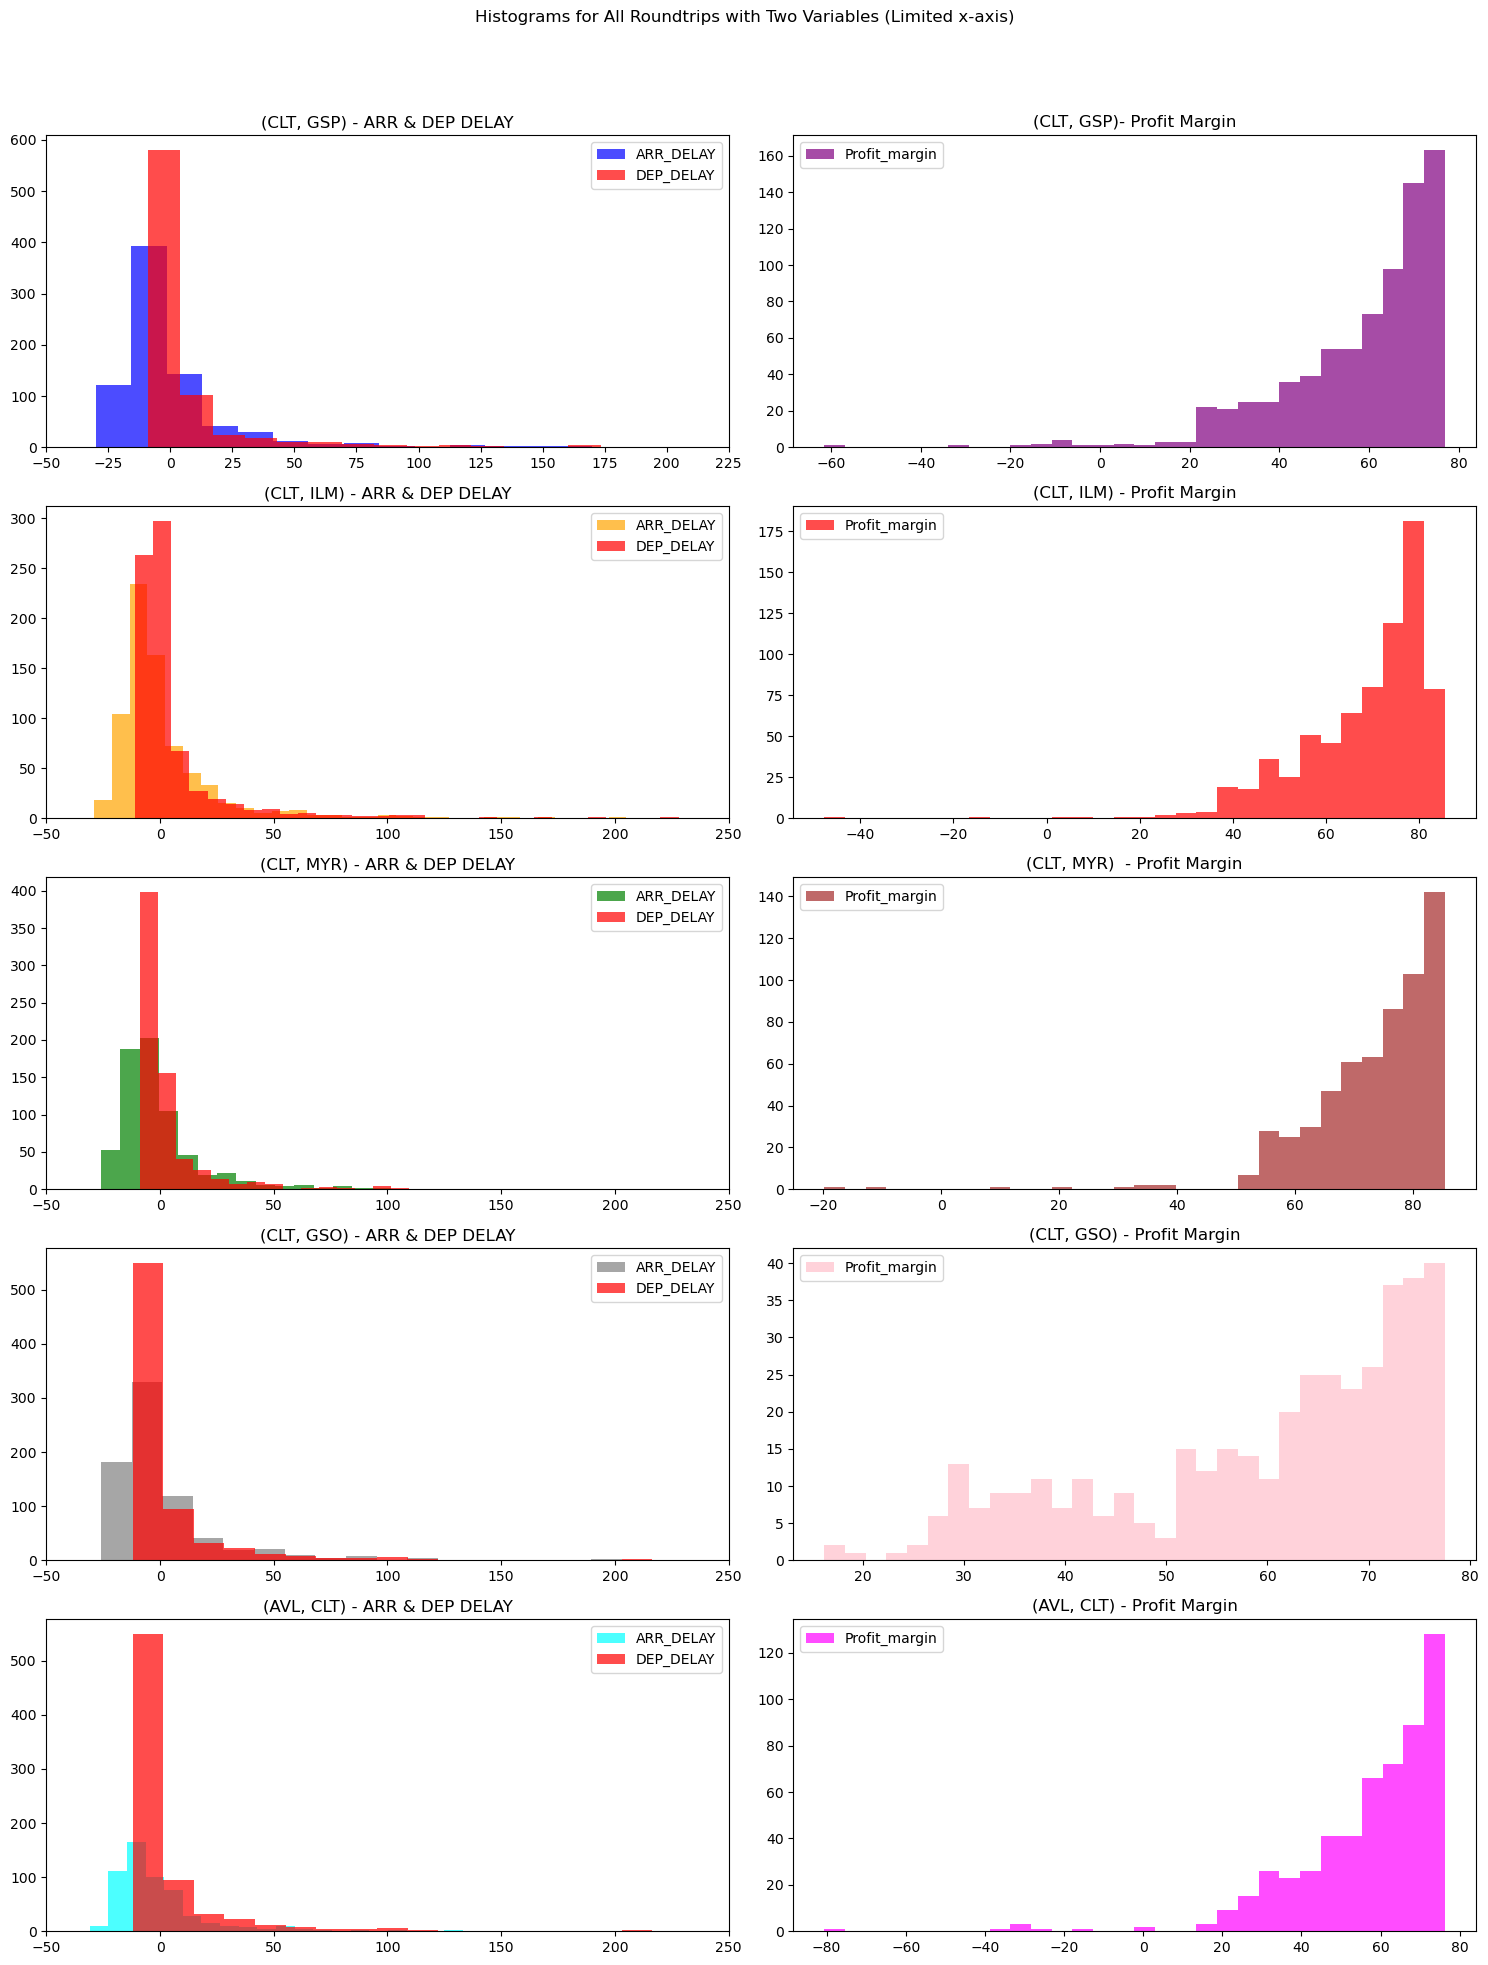

In [50]:

# Create DataFrames for all roundtrips
roundtrip1 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'GSP')]
roundtrip2 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'ILM')]
roundtrip3 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'MYR')]
roundtrip4 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'GSO')]
roundtrip5 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'AVL')]

# Create individual histograms for all roundtrips with limited x-axis
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

fig.suptitle('Histograms for All Roundtrips with Two Variables (Limited x-axis)')

# Plot histograms for Roundtrip 1 with limited x-axis
axes[0, 0].hist(roundtrip1['ARR_DELAY'], alpha=0.7, label='ARR_DELAY', color='blue', bins=30)
axes[0, 0].hist(roundtrip1['DEP_DELAY'], alpha=0.7, label='DEP_DELAY', color='red', bins=30)
axes[0, 1].hist(roundtrip1['Profit_margin'], alpha=0.7, label='Profit_margin', color='purple', bins=30)
axes[0, 0].set_title('(CLT, GSP) - ARR & DEP DELAY')
axes[0, 1].set_title('(CLT, GSP)- Profit Margin')
axes[0, 0].legend()
axes[0, 1].legend()
axes[0, 0].set_xlim(-50, 200)
axes[0, 0].set_xticks(range(-50, 250, 25))

# Plot histograms for Roundtrip 2 with limited x-axis
axes[1, 0].hist(roundtrip2['ARR_DELAY'], alpha=0.7, label='ARR_DELAY', color='orange', bins=30)
axes[1, 0].hist(roundtrip2['DEP_DELAY'], alpha=0.7, label='DEP_DELAY', color='red', bins=30)
axes[1, 1].hist(roundtrip2['Profit_margin'], alpha=0.7, label='Profit_margin', color='red', bins=30)
axes[1, 0].set_title('(CLT, ILM) - ARR & DEP DELAY')
axes[1, 1].set_title('(CLT, ILM) - Profit Margin')
axes[1, 0].legend()
axes[1, 1].legend()
axes[1, 0].set_xlim(-50, 250)

# Plot histograms for Roundtrip 3 with limited x-axis
axes[2, 0].hist(roundtrip3['ARR_DELAY'], alpha=0.7, label='ARR_DELAY', color='green', bins=30)
axes[2, 0].hist(roundtrip3['DEP_DELAY'], alpha=0.7, label='DEP_DELAY', color='red', bins=30)
axes[2, 1].hist(roundtrip3['Profit_margin'], alpha=0.7, label='Profit_margin', color='brown', bins=30)
axes[2, 0].set_title('(CLT, MYR) - ARR & DEP DELAY')
axes[2, 1].set_title('(CLT, MYR)  - Profit Margin')
axes[2, 0].legend()
axes[2, 1].legend()
axes[2, 0].set_xlim(-50, 250)

# Plot histograms for Roundtrip 4 with limited x-axis
axes[3, 0].hist(roundtrip4['ARR_DELAY'], alpha=0.7, label='ARR_DELAY', color='gray', bins=30)
axes[3, 0].hist(roundtrip4['DEP_DELAY'], alpha=0.7, label='DEP_DELAY', color='red', bins=30)
axes[3, 1].hist(roundtrip4['Profit_margin'], alpha=0.7, label='Profit_margin', color='pink', bins=30)
axes[3, 0].set_title('(CLT, GSO) - ARR & DEP DELAY')
axes[3, 1].set_title('(CLT, GSO) - Profit Margin')
axes[3, 0].legend()
axes[3, 1].legend()
axes[3, 0].set_xlim(-50, 250)

# Plot histograms for Roundtrip 5 with limited x-axis
axes[4, 0].hist(roundtrip5['ARR_DELAY'], alpha=0.7, label='ARR_DELAY', color='cyan', bins=30)
axes[4, 0].hist(roundtrip4['DEP_DELAY'], alpha=0.7, label='DEP_DELAY', color='red', bins=30)
axes[4, 1].hist(roundtrip5['Profit_margin'], alpha=0.7, label='Profit_margin', color='magenta', bins=30)
axes[4, 0].set_title('(AVL, CLT) - ARR & DEP DELAY')
axes[4, 1].set_title('(AVL, CLT) - Profit Margin')
axes[4, 0].legend()
axes[4, 1].legend()
axes[4, 0].set_xlim(-50, 250)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


The above histograms represent the top 3 metrics that I will measure as Key Performance Indicators (KPIs) in a tier one scenario. The first two histograms on the left are related to departure delay and arrival delay, aligning with the airline's motto of punctuality. The third histogram on the right depicts the profitability margin, which is crucial for sustaining profits and financial success. As a tier 2 KPI, we can enhance our measurement by keeping track of individual components that contribute to the profit margin, such as fare values, the number of passengers, and operational costs. This comprehensive approach allows for a more detailed analysis of factors influencing overall financial performance, providing valuable insights for strategic decision-making

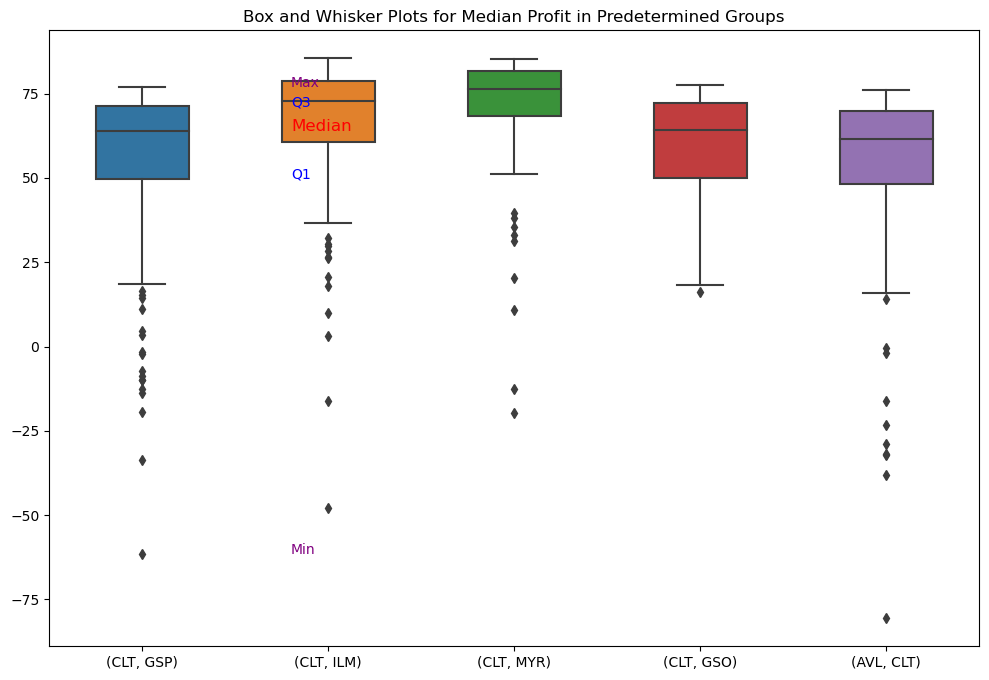

In [51]:
roundtrip1 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'GSP')]
roundtrip2 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'ILM')]
roundtrip3 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'MYR')]
roundtrip4 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'GSO')]
roundtrip5 = Final[(Final['ORIGIN'] == 'CLT') & (Final['DESTINATION'] == 'AVL')]

# Create a DataFrame with the selected groups and 'median_profit'
data = pd.DataFrame({
    '(CLT, GSP)': roundtrip1['Profit_margin'],
    '(CLT, ILM)': roundtrip2['Profit_margin'],
    '(CLT, MYR)': roundtrip3['Profit_margin'],
    '(CLT, GSO)': roundtrip4['Profit_margin'],
    '(AVL, CLT)': roundtrip5['Profit_margin'],
})

# Create a side-by-side boxplot for 'median_profit' using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, width=0.5)
plt.text(0.8, data['(CLT, GSP)'].median(), 'Median', color='red', fontsize=12)
plt.text(0.8, data['(CLT, GSP)'].quantile(0.25), 'Q1', color='blue', fontsize=10)
plt.text(0.8, data['(CLT, GSP)'].quantile(0.75), 'Q3', color='blue', fontsize=10)
plt.text(0.8, data['(CLT, GSP)'].min(), 'Min', color='purple', fontsize=10)
plt.text(0.8, data['(CLT, GSP)'].max(), 'Max', color='purple', fontsize=10)



plt.title('Box and Whisker Plots for Median Profit in Predetermined Groups')
plt.show()

Another effective visualization for one of my key performance indicators (KPIs) would be Box and Whisker plots. These plots offer a clear view of the data distribution, making it easy to identify outliers and understand the spread of the values. An intriguing observation is the skewness in some of the lower values for most round trips. While the data size may not be sufficient to significantly skew the distribution, it's worth investigating further if time permits.

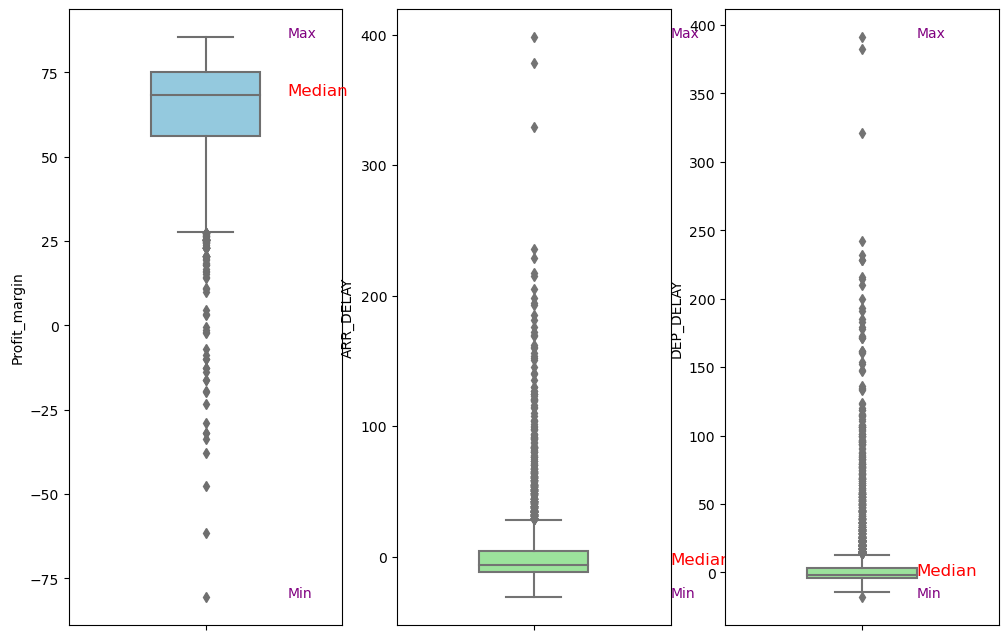

In [52]:
# Create a DataFrame with selected round trips and 'Profit_margin'
# Filter round trips from 'Final' DataFrame
roundtrip_data = Final[(Final['ORIGIN'].isin(['CLT'])) & (Final['DESTINATION'].isin(['GSP', 'ILM', 'MYR', 'GSO', 'AVL']))]

# Add a new column 'ROUND_TRIP' with the corresponding round trip identifier

# Create side-by-side boxplots for 'Profit_margin' and 'ARR_DELAY' using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(y='Profit_margin', data=roundtrip_data, width=0.4, color='skyblue', ax=plt.subplot(1, 3, 1))
plt.text(0.3, roundtrip_data['Profit_margin'].median(), 'Median', color='red', fontsize=12)
plt.text(0.3, roundtrip_data['Profit_margin'].min(), 'Min', color='purple', fontsize=10)
plt.text(0.3, roundtrip_data['Profit_margin'].max(), 'Max', color='purple', fontsize=10)

# Create the second boxplot for 'ARR_DELAY'
sns.boxplot(y='ARR_DELAY', data=roundtrip_data, width=0.4, color='lightgreen', ax=plt.subplot(1, 3, 2))
plt.text(0.5, roundtrip_data['ARR_DELAY'].median(), 'Median', color='red', fontsize=12)
plt.text(0.5, roundtrip_data['ARR_DELAY'].min(), 'Min', color='purple', fontsize=10)
plt.text(0.5, roundtrip_data['ARR_DELAY'].max(), 'Max', color='purple', fontsize=10)

# Create the second boxplot for 'ARR_DELAY'
sns.boxplot(y='DEP_DELAY', data=roundtrip_data, width=0.4, color='lightgreen', ax=plt.subplot(1, 3, 3))
plt.text(0.2, roundtrip_data['DEP_DELAY'].median(), 'Median', color='red', fontsize=12)
plt.text(0.2, roundtrip_data['DEP_DELAY'].min(), 'Min', color='purple', fontsize=10)
plt.text(0.2, roundtrip_data['DEP_DELAY'].max(), 'Max', color='purple', fontsize=10)
# Add labels and legend

plt.show()
# Create a side-by-side boxplot for 'median_profit' using seabor



### Final Recommendation and What is Next

Utilizing the available data, the foremost suggestion for an carrier intending to penetrate the  market is to initiate operations with the top round trips outlined previously. These routes not only exhibit the most lucrative profit margins, but also correspond with the airline's on-time performance objectives. However, it's imperative to emphasize the constraints and assumptions inherent in this project, which impact the derived figures. To ensure a comprehensive assessment, several recommendations and potential enhancements to the analysis are suggested and categorized as follows:


#### Data Quality

Validate the accuracy of the data, particularly addressing anomalies such as negative distance and air time. Additionally, scrutinize the fare data, as it exhibits a notable distribution even for the same round trip. Understanding the reasons behind this variability is crucial, along with an exploration of its potential implications.

#### Data  Availability

I believe this factor will significantly impact the analysis. Firstly, for most airline tickets, seasonality plays a crucial role, and having data limited to Q1 for only one year may not be sufficient for making informed decisions. Ideally, access to multiple years' worth of data would enhance the depth of analysis. Secondly, having fare information for each flight would be beneficial for more accurate cost/revenue calculations and a comprehensive understanding of the cost implications
#### Methodology 

Lastly, we made assumptions that appear overly generalized for an analysis of this nature. Notably, assumptions about uniform capacity per plane, identical costs, and uniform OPEX values may not accurately reflect the complexities of the airline industry. Ideally, obtaining specific information or, alternatively, refining our cost structure based on considerations such as tail numbers of the planes would contribute to a more accurate and nuanced analysis.

#### Metadata 

Throughout the project, I provided explanations whenever I created new variables or datasets. However, for quick reference, I will list some of the key variables and datasets here:

* data_flights= Pandas DataFrame containing the raw data for flights 
* new_flights=  Pandas DataFrame for flights excluding canceled flights and irrelevant columns for this project
* data_tickets = Pandas DataFrame containing the raw data for tickets
* new_tickets =  Pandas DataFrame for flights excluding single flights and irrelevant columns for this project
* data_airports = Pandas DataFrame containing the raw data for airport information 
* airports_code = Pandas DataFrame containing the2 columns type of airport and airport code
* new_tickets_group =  aggregate  the ticket data based on the ORIGIN, DESTINATION, and CARRIER. This aggregation determined the median of the fare for those instances, and the median is less sensitive to extreme values, making it a robust choice for this purpose.
* Final= Pandas DataFrame that consolidates three datasets into one. The primary dataset is the Flight data, followed by merging information on the type of airport from the airport dataset, where only large or medium airports for both ORIGIN and destination are retained. Additionally, we incorporated median fare information by joining the datasets using three parameters: ORIGIN, Destination, and carrier.
* Revenue:Variable/column in Final dataframe Calculated using the median fare of the ticket dataset grouped by ORIGIN, Destination, and carrier.
* Profit:Variable/column in Final dataframe Obtained by subtracting the round trip cost from the revenue.
* Profit Margin:Variable/column in Final dataframe Calculated as the ratio of profit to revenue, multiplied by 100.
* Cost_Oneway_d : Variable/column in Final dataframe, operating cost of one way - Origin to destination
* Cost_Oneway_O : Variable/column in Final dataframe  operating cost of one way - Destination to Origin
* Cost_RoundsTrip : Variable/column in Final dataframe - Both cost added -roundtrip cost 
* grouped_data = A dataset resulting from collapsing the Final DataFrame based on the ORIGIN and Destination combinations. It generates summary statistics for selected cost and revenue variables, contributing insights used to address specific tasks